In [6]:
# Since reported numbers are approximate, they are rounded for the sake of simplicity
severe_ratio = .15
critical_ratio = .05
mild_ratio = 1 - severe_ratio - critical_ratio

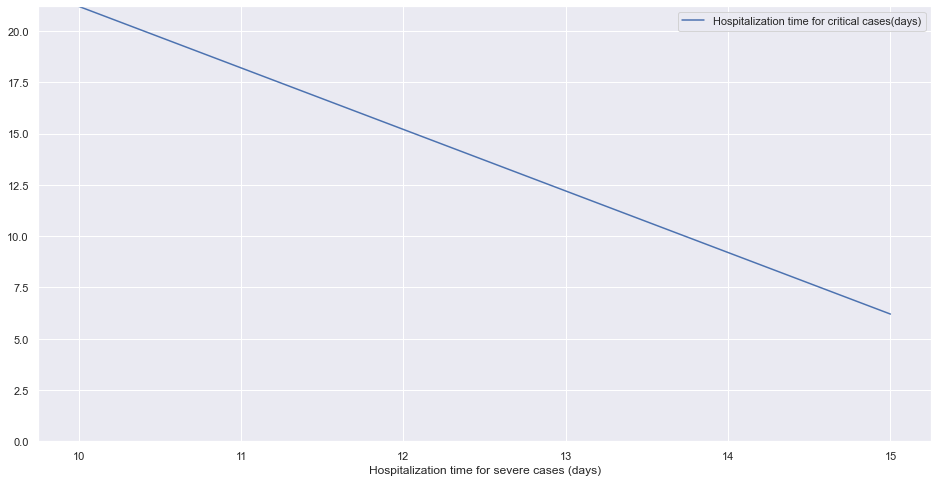

In [7]:
import numpy as np
import pandas as pd
import seaborn as sns
sns.set()

# Data from early Chinese reports
mean_discharge_time = 12.8
severe_ratio_norm = severe_ratio / (severe_ratio + critical_ratio) 
critical_ratio_norm = critical_ratio / (severe_ratio + critical_ratio) 

def compute_icu_discharge_time(severe_discharge_time, mean_discharge_time: float = 12.8):
    ''' Using mean discharge time from https://www.cnn.com/2020/03/20/health/covid-19-recovery-rates-intl/index.html '''
    return (mean_discharge_time - severe_discharge_time * severe_ratio_norm) / critical_ratio_norm

X = np.linspace(10, 15, 100)
y = np.array([compute_icu_discharge_time(x) for x in X])

X_name = 'Hospitalization time for severe cases (days)'
y_name = 'Hospitalization time for critical cases(days)'
df = pd.DataFrame([(x, y_) for x, y_ in zip(X, y)], columns=[X_name, y_name]).set_index(X_name)
df.plot(figsize=(16, 8), grid=True, ylim=(0, max(y)));